In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_excel("Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
df.isnull().any()

Month         False
Passengers    False
dtype: bool

In [4]:
df.isnull().sum()


Month         0
Passengers    0
dtype: int64

In [5]:
df.shape

(96, 2)

In [6]:
df.nunique()

Month         96
Passengers    80
dtype: int64

In [7]:
df.describe()

,Month,Passengers
count,96,96.000000
mean,1998-12-16 05:00:00,213.708333
min,1995-01-01 00:00:00,104.000000
25%,1996-12-24 06:00:00,156.000000
50%,1998-12-16 12:00:00,200.000000
75%,2000-12-08 18:00:00,264.750000
max,2002-12-01 00:00:00,413.000000
std,NaN,71.918216


In [8]:
df.rename({'Month':'Date'},axis=1,inplace=True)

In [9]:
df1=df.copy()
df1.set_index('Date',inplace=True)
df1.index.year

Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
       1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
       1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
       1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
       1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
       2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001,
       2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
      dtype='int32', name='Date')

In [10]:
df1.head()

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [11]:
df["Date"]=pd.to_datetime(df.Date,format="%b-%y")
df["month"]=df.Date.dt.strftime("%b")
df["year"]=df.Date.dt.strftime("%Y")
df

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


<Axes: xlabel='month', ylabel='year'>

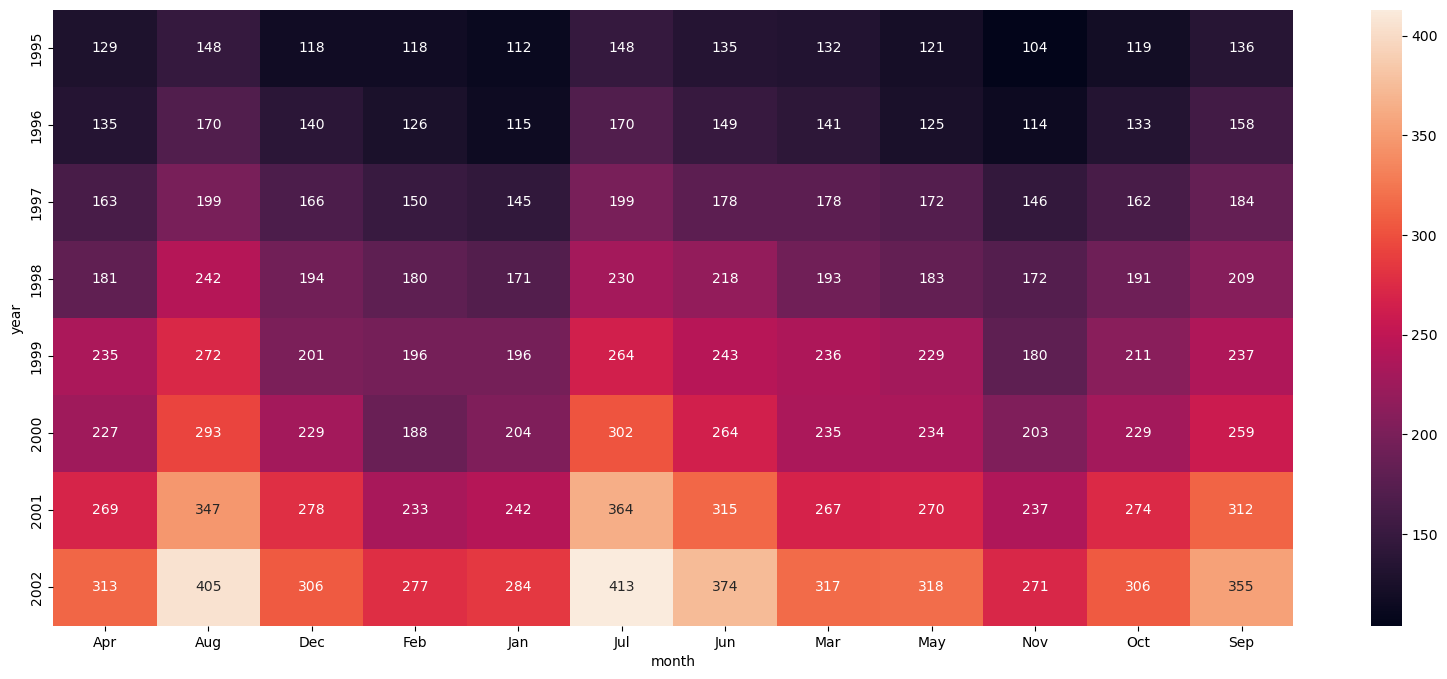

In [12]:
plt.figure(figsize=(20,8))
heatmap_y_month=pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt='g')

In [13]:
size = 72
train_data = df1[:size]
test_data = df1[size:]
train_data,test_data

(            Passengers
 Date                  
 1995-01-01         112
 1995-02-01         118
 1995-03-01         132
 1995-04-01         129
 1995-05-01         121
 ...                ...
 2000-08-01         293
 2000-09-01         259
 2000-10-01         229
 2000-11-01         203
 2000-12-01         229
 
 [72 rows x 1 columns],
             Passengers
 Date                  
 2001-01-01         242
 2001-02-01         233
 2001-03-01         267
 2001-04-01         269
 2001-05-01         270
 2001-06-01         315
 2001-07-01         364
 2001-08-01         347
 2001-09-01         312
 2001-10-01         274
 2001-11-01         237
 2001-12-01         278
 2002-01-01         284
 2002-02-01         277
 2002-03-01         317
 2002-04-01         313
 2002-05-01         318
 2002-06-01         374
 2002-07-01         413
 2002-08-01         405
 2002-09-01         355
 2002-10-01         306
 2002-11-01         271
 2002-12-01         306)

<Figure size 1200x600 with 0 Axes>

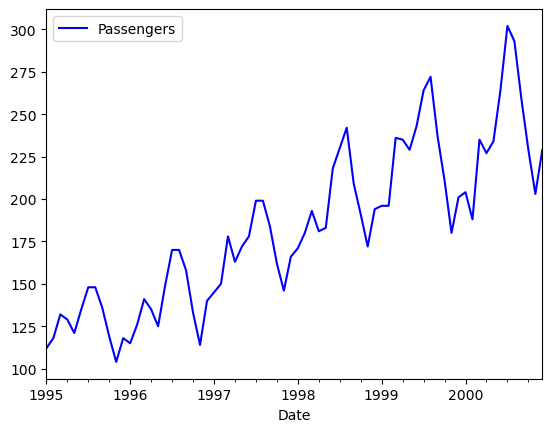

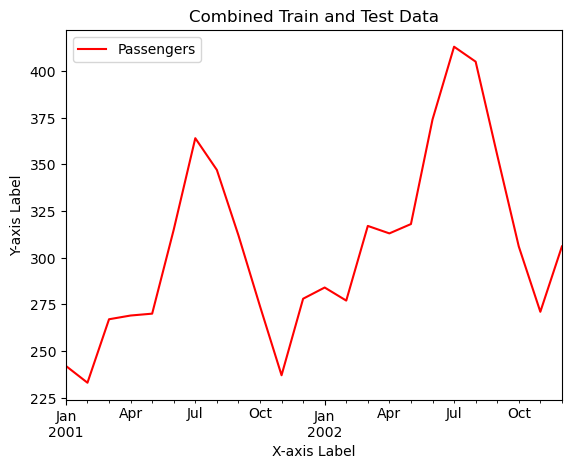

In [14]:
import matplotlib.pyplot as plt

# Assuming train_data and test_data are pandas DataFrames with the same structure
# Replace 'your_column' with the actual column you want to plot

plt.figure(figsize=(12, 6))

# Plot train_data
train_data.plot(legend=True, label='Train', color="blue")

# Plot test_data on the same axes
test_data.plot(legend=True, label='Test', color='red')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Combined Train and Test Data')

# Show the plot
plt.show()


In [15]:
def MAPE(pred,org):
  temp=np.abs((pred-org)/org)*100
  return np.mean(temp)

SME

In [16]:
ses_model = SimpleExpSmoothing(train_data['Passengers']).fit(optimized=True)
test_pred_ses = ses_model.forecast(24)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.Passengers))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.Passengers)
print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 23.38228335004472 
 Train Root Mean Squared Error = 19.031771730910982 
 Test Root Mean Squared Error = 91.11325402904403


C:\Users\sushm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


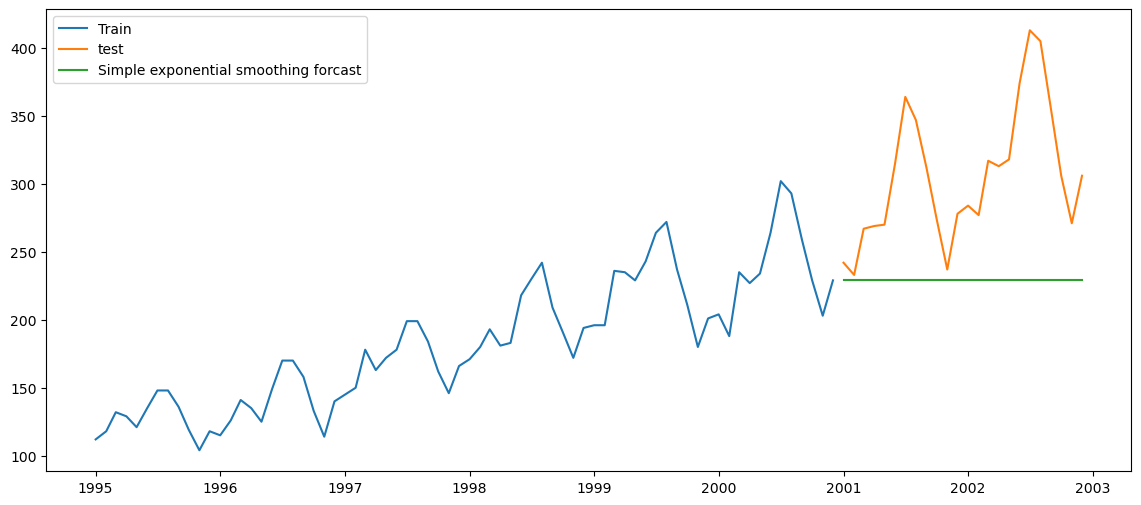

In [17]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

HOLT

In [18]:
dexp_model=Holt(train_data).fit(optimized=True)
test_pred_dexp=dexp_model.forecast(24)
train_pred_dexp=dexp_model.fittedvalues
test_rmse_dexp=sqrt(mean_squared_error(test_pred_dexp,test_data.Passengers))
train_rmse_dexp=sqrt(mean_squared_error(train_pred_dexp,train_data))
mape_dexp=MAPE(test_pred_dexp,test_data.Passengers)

C:\Users\sushm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [19]:
mape_dexp,train_rmse_dexp,test_rmse_dexp

(13.7905908588713, 19.3022744805411, 59.96915188985025)

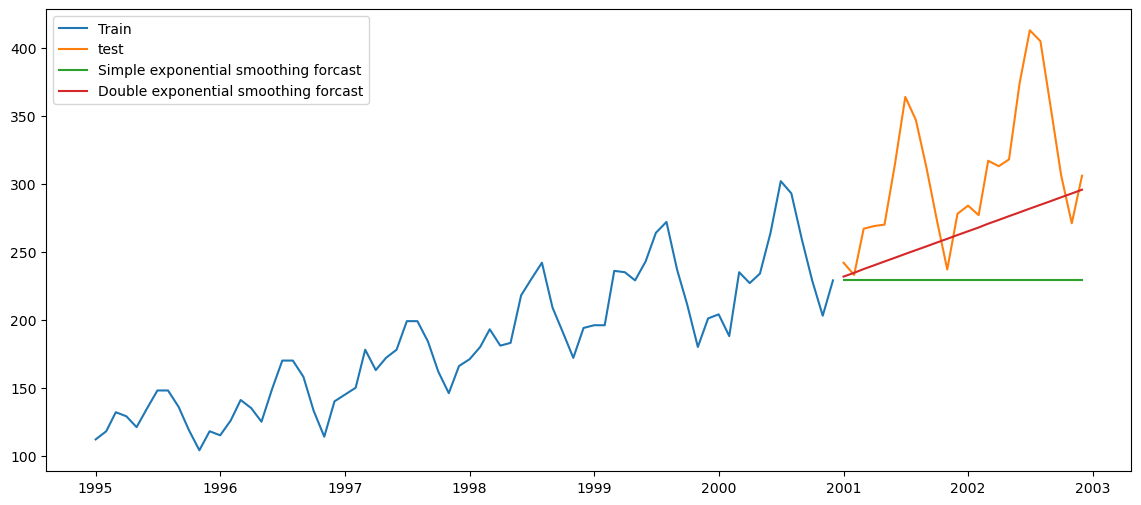

In [20]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

holt+winter

In [21]:
texp_add_model  = ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_ad_texp = texp_add_model.forecast(24)
train_pred_ad_texp = texp_add_model.fittedvalues
test_rmse_ad_texp = sqrt(mean_squared_error(test_pred_ad_texp,test_data.Passengers))
train_rmse_ad_texp = sqrt(mean_squared_error(train_pred_ad_texp,train_data))
mape_ad_texp = MAPE(test_pred_ad_texp,test_data.Passengers)

C:\Users\sushm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [22]:
mape_ad_texp,train_rmse_ad_texp,test_rmse_ad_texp

(12.084270987248692, 7.751303510644329, 47.56853148096913)

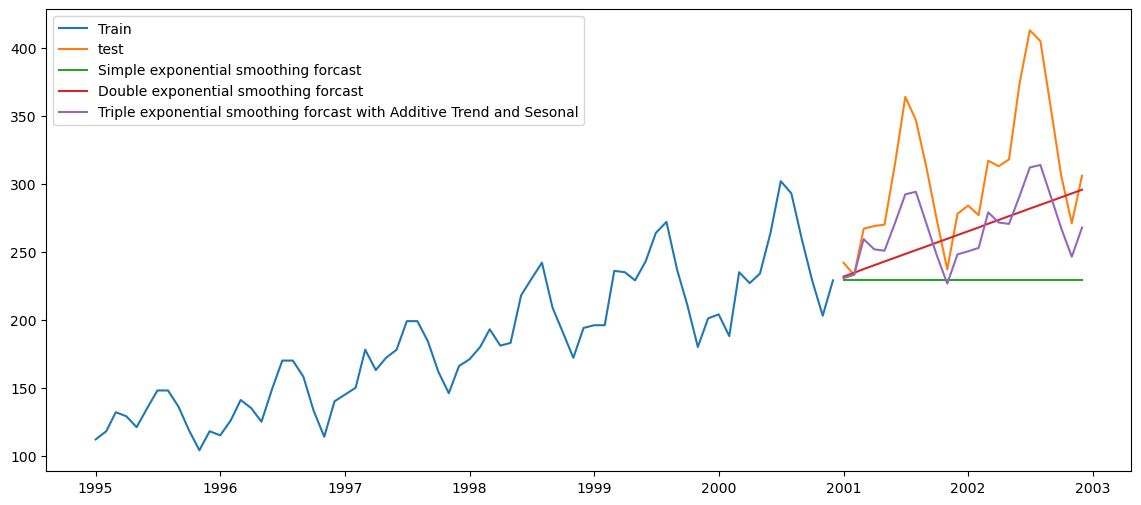

In [23]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

In [32]:
def test_stationarity(timeseries):

    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)


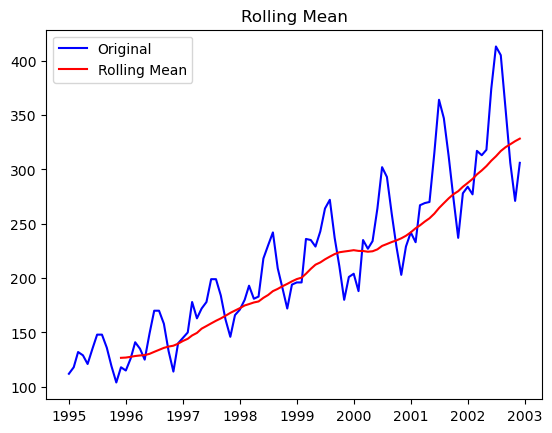

In [33]:
sales= pd.DataFrame()
sales['Passengers'] = df1[['Passengers']]
test_stationarity(sales)

In [26]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series.dropna())
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [27]:
adf_test(sales)

Fail to reject the null hypothesis
Data is non-stationary


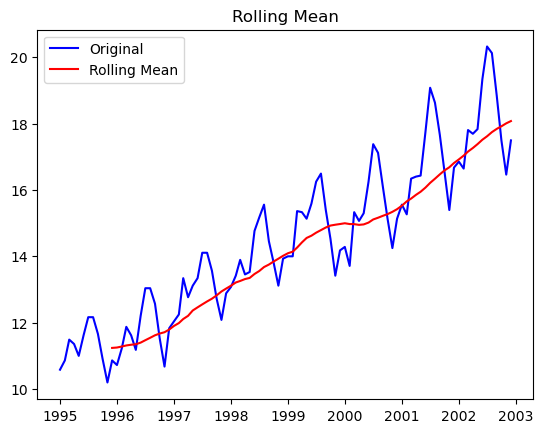

Results of Dickey Fuller Test:
Test Statistic                  0.451435
p-value                         0.983320
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [28]:
square_root= pd.DataFrame()
square_root = df1[['Passengers']]
square_root['Passengers'] = np.sqrt(square_root.Passengers)
test_stationarity(square_root)

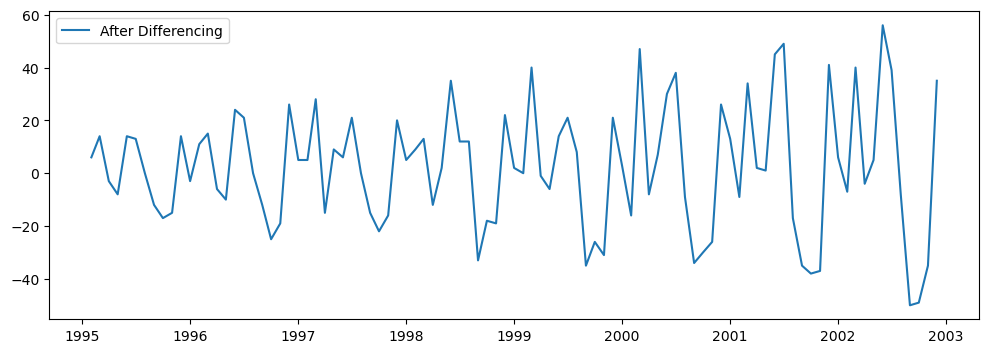

In [29]:
differencing = df1 - df1.shift(1)
differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(differencing, label='After Differencing')
plt.legend(loc='best')
plt.show()

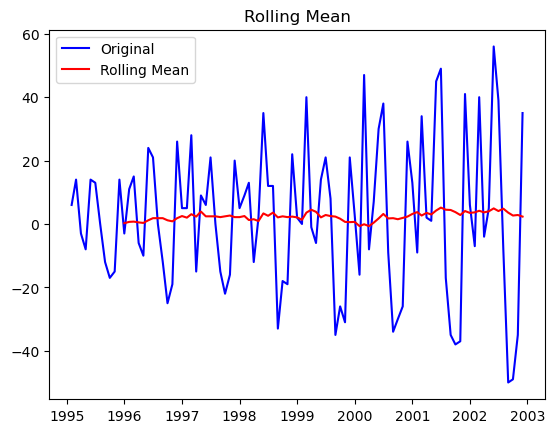

Results of Dickey Fuller Test:
Test Statistic                 -2.150002
p-value                         0.224889
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [30]:
test_stationarity(differencing)

In [31]:
adf_test(differencing)

Fail to reject the null hypothesis
Data is non-stationary
